In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnm


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import linear_model



plt.rcParams['font.family']='Malgun Gothic'



Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choo

In [5]:
fd1=pd.read_excel('d:\\data2\\신한\\finance_data201903.xlsx')

In [6]:
fd2=pd.read_excel('d:\\data2\\신한\\finance_data201909.xlsx')

In [7]:
fd3=pd.read_excel('d:\\data2\\신한\\finance_data202003.xlsx')

In [8]:
fd4=pd.read_excel('d:\\data2\\신한\\finance_data202009.xlsx')

In [9]:
fd5=pd.read_excel('d:\\data2\\신한\\finance_data202103.xlsx')

In [10]:
df=pd.concat([fd1,fd2,fd3,fd4,fd5],axis=0)

In [11]:
df1=df.drop(['법정동코드','법정동','집계구코드'],axis=1)

In [12]:
df1

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,5,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,6,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,6,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,7,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


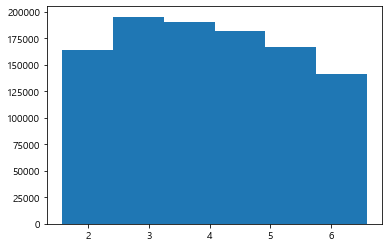

In [13]:
plt.hist(df1.나이,bins=6,align='left')
plt.show()

In [14]:
df2=df1.copy()

MZ세대와 비MZ세대의 통계적 차이

In [15]:

df2.나이=df2.나이.apply(lambda x: 0 if (x==2)|(x==3) else 1) #MZ 0 MZ아닌세대 1
df2

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,0,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,0,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,0,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,0,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,1,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,1,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,1,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,1,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,1,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


해당 데이터에서는 MZ보다 비MZ세대의 데이터가 2배 이상 많았다.

In [16]:
df2.groupby('나이')['지역구'].count()

나이
0    359432
1    680136
Name: 지역구, dtype: int64

In [17]:
check=df2.drop(['성별','직장인여부'],axis=1)

In [65]:
check1=check.loc[check['기준년월']==202103,]
check1

,기준년월,지역구,나이,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,202103,강남구,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0
1,202103,강남구,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0
2,202103,강남구,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0
3,202103,강남구,0,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0
4,202103,강남구,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,1,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,1,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,1,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,1,0,0,409938,812073,5018284,0,0,0,0,0,0,0


In [19]:
check.columns

Index(['기준년월', '지역구', '나이', '급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액',
       '예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액'],
      dtype='object')

In [20]:
a=check.loc[check['나이']==0,['급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액','예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]
b=check.loc[check['나이']==1,['급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액','예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]
pd.options.display.float_format = '{:.5f}'.format

MZ세대의 통계

In [21]:
a.describe().astype(int) #MZ세대

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
count,359432,359432,359432,359432,359432,359432,359432,359432,359432,359432,359432,359432
mean,187071,328,17,1132236,3213539,3089715,51942,29593,501162,1989233,30188,742088
std,756451,53971,2327,819776,2855869,4123748,899131,663769,4871814,14604749,2586135,9303636
min,0,0,0,0,825,0,0,0,0,0,0,0
25%,0,0,0,559842,1342123,0,0,0,0,0,0,0
50%,0,0,0,1144635,2438986,1343027,0,0,0,0,0,0
75%,0,0,0,1656413,4072262,5077388,0,0,0,0,0,0
max,7194817,14229385,395793,5534179,33379175,44467005,66774827,57703483,108276096,336999920,322639172,232285714


비 MZ세대의 통계정보

In [22]:
b.describe().astype(int)

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
count,680136,680136,680136,680136,680136,680136,680136,680136,680136,680136,680136,680136
mean,90990,3821,30193,1227694,4832326,3828030,785056,325424,357584,1950970,227588,26125
std,662019,164943,149899,957305,3784797,7570927,5821216,2889607,4587134,19178166,6905584,1965858
min,0,0,0,0,0,0,0,0,0,0,0,0
25%,0,0,0,243064,2214912,0,0,0,0,0,0,0
50%,0,0,0,1254603,3923662,0,0,0,0,0,0,0
75%,0,0,0,1854966,6444211,4033333,0,0,0,0,0,0
max,8649241,19204960,2670500,6673241,39181798,59611399,112428291,84343760,121151212,449583293,382134384,232800000


평균 급여가 MZ세대가 비MZ세대에 비해 2배 더 높다.
가맹점 매출입금은 비MZ세대가 11.5배 정도 더 높다. 이는 MZ세대에 비해 비MZ세대의 자영업자 비중이 더 높다는 것으로 해석할 수 있다.
연금입금의 경우 MZ세대가 연금을 받는 경우가 거의 없기 때문에 비MZ세대가 연금 비중이 높다.
총소비금액은 비슷하지만 총 평균 수신금액은 비MZ세대가 더 높다. ( 예적금금액/ 신탁금액/수익증권금액)이 비MZ세대가 높은 것으로 인한 것으로 보인다. 이는 MZ세대는 은행 상품을 이용하지 않고 비MZ세대는 주로 은행 상품을이용한다고 볼 수 있다.
주택대출금액과 비MZ세대가 전세자금대출금액은 MZ세대가 더 크다.
이는 비MZ세대와 MZ세대의 주택 소유 형태에서 이 차이가 발생한 것으로 보인다.

급여입금 /가맹점 매출입금/연금입금/총 수신금액/예적금금액/신탁금액/수익증권금액/주택대출금액/전세자금대출금액

In [23]:
clustering=check1[['급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액','예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]

In [24]:
clustering.head()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,0,0,2281097,5125045,0,0,0,0,0,0,0
1,0,0,0,1365430,1145088,0,0,0,0,0,0,0
2,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0
3,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0
4,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0


In [25]:
sc=StandardScaler()
clustering_scaled=sc.fit_transform(clustering)

In [26]:
kmeans=KMeans(n_clusters=4,random_state=1)
clusters=kmeans.fit(clustering_scaled)

In [27]:
clustering['cluster']=clusters.labels_

<ipython-input-27-02ff8d95f228>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering['cluster']=clusters.labels_


In [28]:
print(clustering['cluster'].unique())

[1 0 2 3]


In [29]:
clustering.groupby('cluster').count()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
cluster,,,,,,,,,,,,
0,36496,36496,36496,36496,36496,36496,36496,36496,36496,36496,36496,36496
1,170903,170903,170903,170903,170903,170903,170903,170903,170903,170903,170903,170903
2,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970,1970
3,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517,2517


In [30]:
clustering.groupby('cluster').mean()

,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
cluster,,,,,,,,,,,,
0,525606.04291,1746.85807,82031.90931,2043208.92810,8945177.38237,12850009.90837,496671.59122,184918.78494,135113.90191,4055349.55105,45873.95463,15754.17944
1,2306.30932,243.25836,7051.32448,1045579.63091,3360157.25161,1217369.09153,28986.67012,3622.15168,14815.05215,571476.86822,5815.29696,10256.77243
2,653853.51980,204802.19695,323253.21980,2714151.67665,14354055.37107,18390310.64569,34092950.59442,16240391.49239,1753763.35533,31528013.98477,2858667.97868,0.00000
3,3529602.56099,15059.92491,11565.05642,2746855.91975,11524425.47000,6833282.03655,4354183.67342,696635.84704,44111658.55820,78493536.94358,12244409.21375,36122407.54907


In [31]:
X=clustering_scaled
pca=PCA(n_components=2)
pca.fit(X)
x_pca=pca.transform(X)
pca_df=pd.DataFrame(x_pca)
pca_df['cluster']=clustering['cluster']


C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\wanw9\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


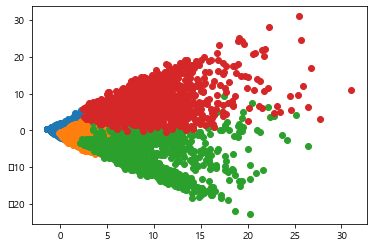

In [32]:
for i in clustering['cluster'].unique():
    tmp = pca_df.loc[pca_df['cluster']==i]
    plt.scatter(tmp[0],tmp[1])

In [33]:
check2=check.copy()
clustering2=check2[['급여입금', '가맹점매출입금', '연금입금', '총소비금액', '총수신금액','예적금금액', '신탁금액', '수익증권금액', '신용대출금액', '담보대출금액', '주택대출금액', '전세자금대출금액']]
sc=StandardScaler()
clustering_scaled2=sc.fit_transform(clustering2)
kmeans=KMeans(n_clusters=4,random_state=1)
clusters=kmeans.fit(clustering_scaled2)
clustering2['cluster']=clusters.labels_
clustering.groupby('cluster').mean()

<ipython-input-33-e2e4a2a38962>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering2['cluster']=clusters.labels_


,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
cluster,,,,,,,,,,,,
0,525606.04291,1746.85807,82031.90931,2043208.92810,8945177.38237,12850009.90837,496671.59122,184918.78494,135113.90191,4055349.55105,45873.95463,15754.17944
1,2306.30932,243.25836,7051.32448,1045579.63091,3360157.25161,1217369.09153,28986.67012,3622.15168,14815.05215,571476.86822,5815.29696,10256.77243
2,653853.51980,204802.19695,323253.21980,2714151.67665,14354055.37107,18390310.64569,34092950.59442,16240391.49239,1753763.35533,31528013.98477,2858667.97868,0.00000
3,3529602.56099,15059.92491,11565.05642,2746855.91975,11524425.47000,6833282.03655,4354183.67342,696635.84704,44111658.55820,78493536.94358,12244409.21375,36122407.54907


In [34]:
clustering1=pd.concat([clustering,check1.나이],axis=1)
clustering1

clustering1.groupby(['cluster','나이'],as_index=False).mean().astype(int)

,cluster,나이,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,0,1267890,336,191,2150952,8592261,9487032,128125,33835,415451,6345846,0,54491
1,0,1,308598,2159,105958,2011709,9048352,13833180,604416,229088,53156,3385719,59285,4429
2,1,0,4591,0,4,1033621,2633384,2120548,5338,2284,18376,821918,0,27176
3,1,1,1006,381,11060,1052383,3773657,703501,42441,4383,12788,428987,9123,630
4,2,0,567617,524524,0,1931600,10557501,10040099,12842613,18073045,2583853,6173726,0,0
5,2,1,655187,199858,328251,2726252,14412764,18519437,34421564,16212051,1740926,31920090,2902874,0
6,3,0,2994661,9770,0,2531301,9486438,6198301,1139217,323525,35428816,81018771,2474272,61677870
7,3,1,4172655,21418,25467,3005974,13974288,7596592,8218893,1145152,54549300,75457953,23989087,5402191


In [35]:
clustering1.groupby(['cluster','나이'],as_index=False)['급여입금'].count().astype(int)[['cluster','나이']]

,cluster,나이
0,0,0
1,0,1
2,1,0
3,1,1
4,2,0
5,2,1
6,3,0
7,3,1


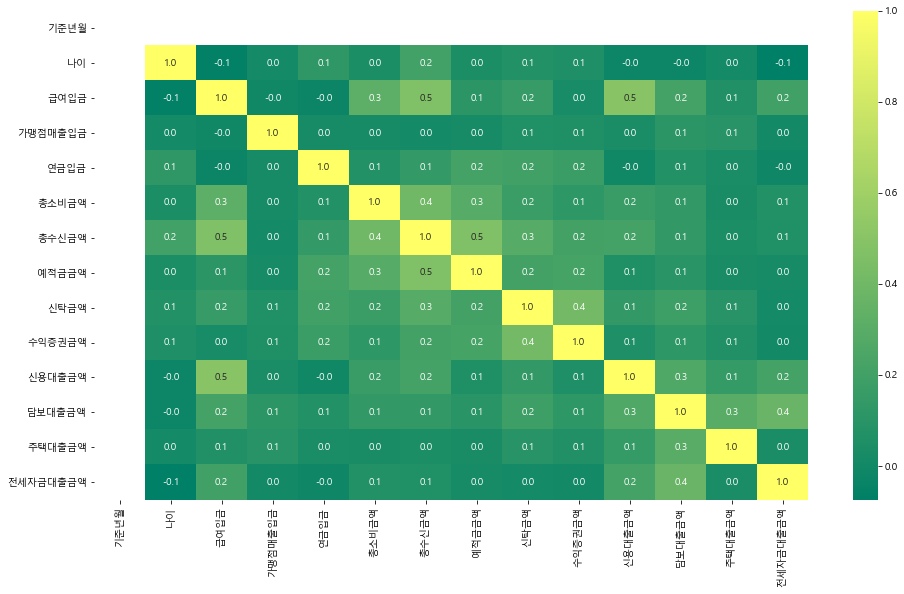

In [36]:
plt.figure(figsize=(16,9))
sns.heatmap(check1.corr(),cmap='summer',annot=True,fmt="0.1f")
plt.show()

In [76]:
df3=df2.copy()

In [38]:
df3=df3.drop(['기준년월','지역구'],axis=1)

In [39]:
df3

,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,0,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,0,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,1,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,1,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,1,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,1,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,1,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


In [40]:
x=df3.iloc[:,1:]
y=df3.iloc[:,0]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1,stratify=y)

print(x_train.shape)
print(y_train.shape)

(779676, 14)
(779676,)


In [57]:
dt=DecisionTreeClassifier(max_depth=200,criterion='entropy',random_state=1)

In [59]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=200, random_state=1)

In [60]:
train_result=dt.predict(x_train)
test_result=dt.predict(x_test)

In [61]:
print(accuracy_score(train_result,y_train))
print(accuracy_score(test_result,y_test))


0.9990059973630072
0.6754767364905422


In [63]:
np.set_printoptions(precision=6, suppress=True)

dt.feature_importances_

array([0.007901, 0.000151, 0.024357, 0.000048, 0.013036, 0.249883,
       0.48716 , 0.2066  , 0.004552, 0.001219, 0.001232, 0.00324 ,
       0.00012 , 0.000501])

In [74]:
check3=check.loc[check['기준년월']!=202103,]

In [78]:
df4=df2.copy()

In [80]:
model_data=df4.loc[df4['기준년월']!=202103,]
test_data=df4.loc[df4['기준년월']==202103,]

In [82]:
model_data.drop(['기준년월','지역구'],axis=1,inplace=True)

C:\Users\wanw9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
model_data

,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,0,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,0,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,1,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210302,1,2,0,0,0,0,1617914,4744313,13365250,0,0,0,0,0,0
210303,1,1,0,0,0,761328,1601251,6292017,6157777,0,0,0,0,0,0
210304,1,2,0,0,0,282372,1588612,8835675,17015061,0,0,0,0,0,0
210305,1,1,0,0,0,334844,1197101,5159501,0,0,0,0,0,0,0


In [84]:
test_data.drop(['기준년월','지역구'],axis=1,inplace=True)

C:\Users\wanw9\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [85]:
test_data

,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,0,1,0,0,0,0,2281097,5125045,0,0,0,0,0,0,0
1,0,2,0,0,0,0,1365430,1145088,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1887395,1645858,2890000,0,0,0,0,0,0
3,0,1,1,3342604,0,0,2033384,10880050,6925250,0,0,0,0,0,0
4,0,2,0,0,0,0,1366078,2805100,5898600,0,0,0,152762581,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,1,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,1,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,1,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,1,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0


In [86]:
df1

,기준년월,지역구,나이,성별,직장인여부,급여입금,가맹점매출입금,연금입금,총소비금액,총수신금액,예적금금액,신탁금액,수익증권금액,신용대출금액,담보대출금액,주택대출금액,전세자금대출금액
0,201903,강남구,2,1,0,0,0,0,2018319,2430312,0,0,0,0,0,0,0
1,201903,강남구,2,2,0,0,0,0,2326837,2221251,0,0,0,0,0,0,0
2,201903,강남구,3,1,0,0,0,0,1771639,1382057,1841250,0,0,0,0,0,0
3,201903,강남구,3,2,0,0,0,0,1745601,2902578,3561440,0,0,0,0,0,0
4,201903,강남구,4,1,0,0,0,0,1712433,1746992,8831666,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211881,202103,중랑구,5,2,0,0,0,0,1425069,4369530,9185200,0,0,0,0,0,0
211882,202103,중랑구,6,1,0,0,0,738450,2015000,6877740,2478000,0,0,0,0,0,0
211883,202103,중랑구,6,2,0,0,0,595480,1495569,9297919,19789456,0,0,0,0,0,0
211884,202103,중랑구,7,1,0,0,0,409938,812073,5018284,0,0,0,0,0,0,0
